<a href="https://colab.research.google.com/github/etmcrae/Project-5/blob/main/EMILY_MCRAE_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing



### Part 1)



In [ ]:
# importing libraries and installing the Wikipedia API

%%capture output

!pip3 install wikipedia-api
import numpy as np
import pandas as pd
import random
import re
from textblob import TextBlob
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

pd.options.display.max_columns = 100

import nltk
from nltk.corpus import stopwords
nltk.download('wordnet')

# nltk.download('omw-1.4')
nltk.download('punkt_tab')
# nltk.download('averaged_perceptron_tagger_eng')
# Download the 'stopwords' dataset
nltk.download('stopwords') # This line downloads the necessary 'stopwords' resource

import wikipediaapi

In [ ]:
# url cotaining the list of famous people, and converting to df
# printing summary statistics to ensure the df is clean for analysis


url = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.5-NLP/Data/NLP.csv"
csv_data = pd.read_csv(url)
df = pd.DataFrame(csv_data)
print(df.head())
print(df.info())
print(df.describe())

                                                 URI                 name  \
0        <http://dbpedia.org/resource/Digby_Morrell>        Digby Morrell   
1       <http://dbpedia.org/resource/Alfred_J._Lewy>       Alfred J. Lewy   
2        <http://dbpedia.org/resource/Harpdog_Brown>        Harpdog Brown   
3  <http://dbpedia.org/resource/Franz_Rottensteiner>  Franz Rottensteiner   
4               <http://dbpedia.org/resource/G-Enka>               G-Enka   

                                                text  
0  digby morrell born 10 october 1979 is a former...  
1  alfred j lewy aka sandy lewy graduated from un...  
2  harpdog brown is a singer and harmonica player...  
3  franz rottensteiner born in waidmannsfeld lowe...  
4  henry krvits born 30 december 1974 in tallinn ...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42786 entries, 0 to 42785
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   URI     42786 non-null

In [ ]:
# A regular expressions passes through the text columns and removes ' and
# "s" and from possessives, and and makes text lower case

def clean_text(text):
  text = re.sub(r"(\n|'s|'| )+", " ", text)
  text = text.lower()
  text = re.sub(r'\d+', '', text) # this removes numbers
  months = r"\b(january|february|march|april|may|june|july|august|september|october|november|december)\b" #removes months
  text = re.sub(months, '', text, flags=re.IGNORECASE) #removes months
  text = re.sub(r'[^\w\s]', '', text) #removes punctuation
  return text
df['text'] = df['text'].apply(clean_text)

def remove_name_from_text(row):
    name = row['name'].lower()  # Convert name to lowercase for case-insensitive matching
    text = row['text']
    text = text.replace(name, "")  # Remove the name from the text
    return text

df['text'] = df.apply(remove_name_from_text, axis=1)

print(df.head(10))

                                                 URI                 name  \
0        <http://dbpedia.org/resource/Digby_Morrell>        Digby Morrell   
1       <http://dbpedia.org/resource/Alfred_J._Lewy>       Alfred J. Lewy   
2        <http://dbpedia.org/resource/Harpdog_Brown>        Harpdog Brown   
3  <http://dbpedia.org/resource/Franz_Rottensteiner>  Franz Rottensteiner   
4               <http://dbpedia.org/resource/G-Enka>               G-Enka   
5        <http://dbpedia.org/resource/Sam_Henderson>        Sam Henderson   
6        <http://dbpedia.org/resource/Aaron_LaCrate>        Aaron LaCrate   
7      <http://dbpedia.org/resource/Trevor_Ferguson>      Trevor Ferguson   
8         <http://dbpedia.org/resource/Grant_Nelson>         Grant Nelson   
9         <http://dbpedia.org/resource/Cathy_Caruth>         Cathy Caruth   

                                                text  
0   born    is a former australian rules football...  
1  alfred j lewy aka sandy lewy graduated 

In [ ]:
# Removing stopwords, which are transitional words such as 'and', 'they', 'if'
# from the text column

stop_words = set(nltk.corpus.stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

df['text'] = df['text'].apply(remove_stopwords)

print(df.head(10))


                                                 URI                 name  \
0        <http://dbpedia.org/resource/Digby_Morrell>        Digby Morrell   
1       <http://dbpedia.org/resource/Alfred_J._Lewy>       Alfred J. Lewy   
2        <http://dbpedia.org/resource/Harpdog_Brown>        Harpdog Brown   
3  <http://dbpedia.org/resource/Franz_Rottensteiner>  Franz Rottensteiner   
4               <http://dbpedia.org/resource/G-Enka>               G-Enka   
5        <http://dbpedia.org/resource/Sam_Henderson>        Sam Henderson   
6        <http://dbpedia.org/resource/Aaron_LaCrate>        Aaron LaCrate   
7      <http://dbpedia.org/resource/Trevor_Ferguson>      Trevor Ferguson   
8         <http://dbpedia.org/resource/Grant_Nelson>         Grant Nelson   
9         <http://dbpedia.org/resource/Cathy_Caruth>         Cathy Caruth   

                                                text  
0  born former australian rules footballer played...  
1  alfred j lewy aka sandy lewy graduated 

In [ ]:
# Singularizing words in the tezxt column- takes a long time.

def singularize_text(text):
    words = text.split()
    singularized_words = [Word(word).singularize() for word in words]
    return " ".join(singularized_words)

df['text'] = df['text'].apply(singularize_text)

print(df.head(10))


                                                 URI                 name  \
0        <http://dbpedia.org/resource/Digby_Morrell>        Digby Morrell   
1       <http://dbpedia.org/resource/Alfred_J._Lewy>       Alfred J. Lewy   
2        <http://dbpedia.org/resource/Harpdog_Brown>        Harpdog Brown   
3  <http://dbpedia.org/resource/Franz_Rottensteiner>  Franz Rottensteiner   
4               <http://dbpedia.org/resource/G-Enka>               G-Enka   
5        <http://dbpedia.org/resource/Sam_Henderson>        Sam Henderson   
6        <http://dbpedia.org/resource/Aaron_LaCrate>        Aaron LaCrate   
7      <http://dbpedia.org/resource/Trevor_Ferguson>      Trevor Ferguson   
8         <http://dbpedia.org/resource/Grant_Nelson>         Grant Nelson   
9         <http://dbpedia.org/resource/Cathy_Caruth>         Cathy Caruth   

                                                text  
0  born former australian rule footballer played ...  
1  alfred j lewy aka sandy lewy graduated 

In [ ]:
# Uses random to select one person from the list and outputs their name
#will change each time that this code is run. so it is commented out

#random_person = df.sample(n=1) #the n=1 defines the number of random items to select
#print(random_person['name'])


In [ ]:
# sentiment analysis on name: Gail Bowen, id is 40391, on her text column, and
# then on the 10 nearest to her
# Initialize sentiment_polarity to a default value (e.g., 0)
sentiment_polarity = 0  # Initialize before using in the 'if' condition

if sentiment_polarity > 0.1:
  sentiment = "positive"
elif sentiment_polarity < -0.1:
  sentiment = "negative"
else:
  sentiment = "neutral"

gail_bowen_data = df[df['name'] == 'Gail Bowen']

if not gail_bowen_data.empty:
    gail_bowen_text = gail_bowen_data['text'].iloc[0]
    analysis = TextBlob(gail_bowen_text)
    sentiment_polarity = analysis.sentiment.polarity
    print(f"Sentiment Polarity for Gail Bowen: {sentiment}, {sentiment_polarity}")


    # Calculate cosine similarity between Gail Bowen and others
    from sklearn.metrics.pairwise import cosine_similarity
    from sklearn.feature_extraction.text import TfidfVectorizer

    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(df['text'])

    gail_bowen_index = gail_bowen_data.index[0]
    cosine_similarities = cosine_similarity(tfidf_matrix[gail_bowen_index], tfidf_matrix).flatten()

    # Find the 10 most similar people (excluding Gail Bowen)
    related_docs_indices = cosine_similarities.argsort()[:-11:-1]
    related_docs_indices = related_docs_indices[related_docs_indices != gail_bowen_index]

    print("\n10 most similar people to Gail Bowen:")
    for i in related_docs_indices:
        print(f"- {df['name'].iloc[i]} (URL: {df['URI'].iloc[i]}), {sentiment}, {sentiment_polarity}")
else:
    print("Gail Bowen not found in the dataset.") #done like this to catch errors when passing from the randon to this step

# Create df2 with the 10 most similar individuals
df2 = df.iloc[related_docs_indices][['name', 'URI']]
df2['sentiment'] = sentiment #add the sentiment to df2
df2['sentiment_polarity'] = sentiment_polarity #add the sentiment polarity to df2
df2['run'] = 1

print("\n10 most similar people to Gail Bowen (stored in df2):")
print(df2)  # Print the df2 DataFrame

Sentiment Polarity for Gail Bowen: neutral, 0.035555555555555556

10 most similar people to Gail Bowen:
- Joanne Crofford (URL: <http://dbpedia.org/resource/Joanne_Crofford>), neutral, 0.035555555555555556
- Ken Mitchell (URL: <http://dbpedia.org/resource/Ken_Mitchell>), neutral, 0.035555555555555556
- Kevin Yates (politician) (URL: <http://dbpedia.org/resource/Kevin_Yates_(politician)>), neutral, 0.035555555555555556
- Dale Furutani (URL: <http://dbpedia.org/resource/Dale_Furutani>), neutral, 0.035555555555555556
- Gordon Gray Currie (URL: <http://dbpedia.org/resource/Gordon_Gray_Currie>), neutral, 0.035555555555555556
- Douglas Francis McArthur (URL: <http://dbpedia.org/resource/Douglas_Francis_McArthur>), neutral, 0.035555555555555556
- Brent Bambury (URL: <http://dbpedia.org/resource/Brent_Bambury>), neutral, 0.035555555555555556
- Warren McCall (URL: <http://dbpedia.org/resource/Warren_McCall>), neutral, 0.035555555555555556
- Paul Chantler (URL: <http://dbpedia.org/resource/Paul_

In [ ]:
df2.head(10)

,name,URI,sentiment,sentiment_polarity,run
40847,Joanne Crofford,<http://dbpedia.org/resource/Joanne_Crofford>,neutral,0.035556,1
12235,Ken Mitchell,<http://dbpedia.org/resource/Ken_Mitchell>,neutral,0.035556,1
1557,Kevin Yates (politician),<http://dbpedia.org/resource/Kevin_Yates_(poli...,neutral,0.035556,1
40382,Dale Furutani,<http://dbpedia.org/resource/Dale_Furutani>,neutral,0.035556,1
609,Gordon Gray Currie,<http://dbpedia.org/resource/Gordon_Gray_Currie>,neutral,0.035556,1
31251,Douglas Francis McArthur,<http://dbpedia.org/resource/Douglas_Francis_M...,neutral,0.035556,1
21513,Brent Bambury,<http://dbpedia.org/resource/Brent_Bambury>,neutral,0.035556,1
21282,Warren McCall,<http://dbpedia.org/resource/Warren_McCall>,neutral,0.035556,1
32363,Paul Chantler,<http://dbpedia.org/resource/Paul_Chantler>,neutral,0.035556,1


### Part 2)



In [ ]:
# Pull out the page from wikipedia - https://en.wikipedia.org/wiki/Gail_Bowen
topic = 'Gail Bowen'
wikip = wikipediaapi.Wikipedia(user_agent = 'foobar')
page_ex = wikip.page(topic)
wiki_text = page_ex.text
wiki_text

"Gail Dianne Bowen  (née Bartholomew; born September 22, 1942) is a Canadian playwright, writer of mystery novels and educator.\n\nBiography\nBorn in Toronto, Ontario, Bowen was educated at the University of Toronto, where she earned a Bachelor of Arts degree in 1964. She then studied at the University of Waterloo, where she received a master's degree in 1975, and the University of Saskatchewan. She subsequently taught English in Saskatchewan, and was associate professor of English at First Nations University of Canada before retiring from teaching. She currently lives in Regina, Saskatchewan.\nBowen's mystery novels feature Joanne Kilbourn, a widowed mother, political analyst and university professor who finds herself occasionally involved in criminal investigations in various parts of Saskatchewan. Many have been adapted as Canadian television movies by Shaftesbury Films.\nSeveral of her plays have been produced, including Dancing in Poppies, an adaptation of Beauty and the Beast, Th

In [ ]:
# Cleans the data, similar to in section 1

pattern = re.compile(r"(\n|'s|'| )+")
wiki_text_clean = re.sub(pattern,' ', wiki_text.lower())
wiki_text_clean = re.sub(r'\d+', '', wiki_text_clean) # this removes numbers
months = r"\b(january|february|march|april|may|june|july|august|september|october|november|december)\b" #removes months
wiki_text_clean = re.sub(months, '', wiki_text_clean, flags=re.IGNORECASE) #removes months
name = 'Gail Bowen'
wiki_text_clean = wiki_text_clean.replace(name, "")
stop_words = set(nltk.corpus.stopwords.words('english'))
words = wiki_text_clean.split()
filtered_words = [word for word in words if word.lower() not in stop_words]
wiki_text_clean = " ".join(filtered_words)
wiki_text_clean = re.sub(r'[^\w\s]', '', wiki_text_clean) #removes punctuation
wiki_text_clean = singularize_text(wiki_text_clean)
wiki_text_clean

'gail dianne bowen née bartholomew born canadian playwright writer mystery novel educator biography born toronto ontario bowen educated university toronto earned bachelor art degree studied university waterloo received master degree university saskatchewan subsequently taught english saskatchewan associate professor english first nation university canada retiring teaching currently life regina saskatchewan bowen mystery novel feature joanne kilbourn widowed mother political analyst university professor find occasionally involved criminal investigation variou part saskatchewan many adapted canadian television movie shaftesbury film several play produced including dancing poppy adaptation beauty beast tree adaptation peter pan premiering globe theatre regina radio play dr dolittle broadcast cbc radio wrote world according charlie d radio play focusing radio talk show host joanne kilbourn mystery broadcast cbc radio followup episode charlie d aired part worldplay series airing public radi

In [ ]:
analysis = TextBlob(wiki_text_clean)
sentiment_polarity = analysis.sentiment.polarity

if sentiment_polarity > 0.1:
  sentiment = "positive"
elif sentiment_polarity < -0.1:
  sentiment = "negative"
else:
  sentiment = "neutral"

print(f"The overall sentiment for Gail Bowen is {sentiment}, at {sentiment_polarity}")


The overall sentiment for Gail Bowen is positive, at 0.11287878787878786


In [ ]:
# Sentiment analysis using wiki_text_clean:
analysis = TextBlob(wiki_text_clean)
sentiment_polarity = analysis.sentiment.polarity

if sentiment_polarity > 0.1:
    sentiment = "positive"
elif sentiment_polarity < -0.1:
    sentiment = "negative"
else:
    sentiment = "neutral"

print(f"The overall sentiment for Gail Bowen (from Wikipedia) is {sentiment}, at {sentiment_polarity}")

# Calculate cosine similarity:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([wiki_text_clean] + df['text'].tolist())

gail_bowen_index = 0  # wiki_text_clean is now the first element
cosine_similarities = cosine_similarity(tfidf_matrix[gail_bowen_index], tfidf_matrix).flatten()

# Find the 10 most similar people (excluding Gail Bowen):
related_docs_indices = cosine_similarities.argsort()[:-11:-1]
related_docs_indices = related_docs_indices[related_docs_indices != gail_bowen_index]

print("\n10 most similar people to Gail Bowen (based on Wikipedia text):")
for i in related_docs_indices:
    print(f"- {df['name'].iloc[i]} (URL: {df['URI'].iloc[i]}), {sentiment}, {sentiment_polarity}")

# Create df3 with the 10 most similar individuals
df3 = df.iloc[related_docs_indices][['name', 'URI']]
df3['sentiment'] = sentiment  # add the sentiment to df3
df3['sentiment_polarity'] = sentiment_polarity  # add the sentiment polarity to df3
df3['run'] = 2

print("\n10 most similar people to Gail Bowen (stored in df3):")
print(df3)  # Print the df3 DataFrame

The overall sentiment for Gail Bowen (from Wikipedia) is positive, at 0.11287878787878786

10 most similar people to Gail Bowen (based on Wikipedia text):
- Benny Rousselle (URL: <http://dbpedia.org/resource/Benny_Rousselle>), positive, 0.11287878787878786
- Ella Washington (URL: <http://dbpedia.org/resource/Ella_Washington>), positive, 0.11287878787878786
- Marvell Scott (URL: <http://dbpedia.org/resource/Marvell_Scott>), positive, 0.11287878787878786
- Jerry Recco (URL: <http://dbpedia.org/resource/Jerry_Recco>), positive, 0.11287878787878786
- Gary De Roux (URL: <http://dbpedia.org/resource/Gary_De_Roux>), positive, 0.11287878787878786
- Llyn Foulkes (URL: <http://dbpedia.org/resource/Llyn_Foulkes>), positive, 0.11287878787878786
- Alexander Nor%C3%A9n (URL: <http://dbpedia.org/resource/Alexander_Nor%C3%A9n>), positive, 0.11287878787878786
- Mohan Ranade (URL: <http://dbpedia.org/resource/Mohan_Ranade>), positive, 0.11287878787878786
- Jerome Dhas Varuvel (URL: <http://dbpedia.org/r

In [ ]:
# Concatenate df2 and df3
df_combined = pd.concat([df2, df3], ignore_index=True)
df_combined


,name,URI,sentiment,sentiment_polarity,run
0,Joanne Crofford,<http://dbpedia.org/resource/Joanne_Crofford>,neutral,0.035556,1
1,Ken Mitchell,<http://dbpedia.org/resource/Ken_Mitchell>,neutral,0.035556,1
2,Kevin Yates (politician),<http://dbpedia.org/resource/Kevin_Yates_(poli...,neutral,0.035556,1
3,Dale Furutani,<http://dbpedia.org/resource/Dale_Furutani>,neutral,0.035556,1
4,Gordon Gray Currie,<http://dbpedia.org/resource/Gordon_Gray_Currie>,neutral,0.035556,1
5,Douglas Francis McArthur,<http://dbpedia.org/resource/Douglas_Francis_M...,neutral,0.035556,1
6,Brent Bambury,<http://dbpedia.org/resource/Brent_Bambury>,neutral,0.035556,1
7,Warren McCall,<http://dbpedia.org/resource/Warren_McCall>,neutral,0.035556,1
8,Paul Chantler,<http://dbpedia.org/resource/Paul_Chantler>,neutral,0.035556,1
9,Benny Rousselle,<http://dbpedia.org/resource/Benny_Rousselle>,positive,0.112879,2


In [ ]:
# Remove '<' and '>' from 'URI' column
df_combined['URI'] = df_combined['URI'].str.replace('<', '', regex=False).str.replace('>', '', regex=False)

# Print the updated DataFrame
print(df_combined)

                        name  \
0            Joanne Crofford   
1               Ken Mitchell   
2   Kevin Yates (politician)   
3              Dale Furutani   
4         Gordon Gray Currie   
5   Douglas Francis McArthur   
6              Brent Bambury   
7              Warren McCall   
8              Paul Chantler   
9            Benny Rousselle   
10           Ella Washington   
11             Marvell Scott   
12               Jerry Recco   
13              Gary De Roux   
14              Llyn Foulkes   
15      Alexander Nor%C3%A9n   
16              Mohan Ranade   
17       Jerome Dhas Varuvel   

                                                  URI sentiment  \
0         http://dbpedia.org/resource/Joanne_Crofford   neutral   
1            http://dbpedia.org/resource/Ken_Mitchell   neutral   
2   http://dbpedia.org/resource/Kevin_Yates_(polit...   neutral   
3           http://dbpedia.org/resource/Dale_Furutani   neutral   
4      http://dbpedia.org/resource/Gordon_Gray_Currie   

In [ ]:
# prompt: pulling the top 10

wiki_wiki = wikipediaapi.Wikipedia(
    language='en',
    extract_format=wikipediaapi.ExtractFormat.WIKI,
    user_agent='foobar'
)

def get_wiki_text(url):
    try:
        page_title = url.split('/')[-1]
        page_py = wiki_wiki.page(page_title)
        if page_py.exists():
            return page_py.text
        else:
            return "Page not found"
    except Exception as e:
        print(f"Error fetching URL {url}: {e}")
        return "Error fetching page"

# Apply the function to the URLs where 'run' is 2
df_combined.loc[df_combined['run'] == 2, 'wiki_text'] = df_combined.loc[df_combined['run'] == 2, 'URI'].apply(get_wiki_text)

df_combined


,name,URI,sentiment,sentiment_polarity,run,wiki_text
0,Joanne Crofford,http://dbpedia.org/resource/Joanne_Crofford,neutral,0.035556,1,NaN
1,Ken Mitchell,http://dbpedia.org/resource/Ken_Mitchell,neutral,0.035556,1,NaN
2,Kevin Yates (politician),http://dbpedia.org/resource/Kevin_Yates_(polit...,neutral,0.035556,1,NaN
3,Dale Furutani,http://dbpedia.org/resource/Dale_Furutani,neutral,0.035556,1,NaN
4,Gordon Gray Currie,http://dbpedia.org/resource/Gordon_Gray_Currie,neutral,0.035556,1,NaN
5,Douglas Francis McArthur,http://dbpedia.org/resource/Douglas_Francis_Mc...,neutral,0.035556,1,NaN
6,Brent Bambury,http://dbpedia.org/resource/Brent_Bambury,neutral,0.035556,1,NaN
7,Warren McCall,http://dbpedia.org/resource/Warren_McCall,neutral,0.035556,1,NaN
8,Paul Chantler,http://dbpedia.org/resource/Paul_Chantler,neutral,0.035556,1,NaN
9,Benny Rousselle,http://dbpedia.org/resource/Benny_Rousselle,positive,0.112879,2,"Benedict G. Rousselle, known as Benny Roussell..."


In [ ]:
# cleaned txt for loop


def clean_wiki_text(wiki_text):
    if pd.isnull(wiki_text): #handles null values in the column
        return ""

    pattern = re.compile(r"(\n|'s|'| )+")
    wiki_text_clean = re.sub(pattern, ' ', wiki_text.lower())
    wiki_text_clean = re.sub(r'\d+', '', wiki_text_clean)
    months = r"\b(january|february|march|april|may|june|july|august|september|october|november|december)\b"
    wiki_text_clean = re.sub(months, '', wiki_text_clean, flags=re.IGNORECASE)
    name = 'Gail Bowen'  # Replace with the actual target name if different
    wiki_text_clean = wiki_text_clean.replace(name, "")
    stop_words = set(nltk.corpus.stopwords.words('english'))
    words = wiki_text_clean.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    wiki_text_clean = " ".join(filtered_words)
    wiki_text_clean = re.sub(r'[^\w\s]', '', wiki_text_clean)
    wiki_text_clean = singularize_text(wiki_text_clean)
    return wiki_text_clean

# Apply the cleaning function to the 'wiki_text' column
df_combined['wiki_text_clean'] = df_combined['wiki_text'].apply(clean_wiki_text)

#Now you can use the cleaned wiki_text in the rest of your code
df_combined


,name,URI,sentiment,sentiment_polarity,run,wiki_text,wiki_text_clean
0,Joanne Crofford,http://dbpedia.org/resource/Joanne_Crofford,neutral,0.035556,1,NaN,
1,Ken Mitchell,http://dbpedia.org/resource/Ken_Mitchell,neutral,0.035556,1,NaN,
2,Kevin Yates (politician),http://dbpedia.org/resource/Kevin_Yates_(polit...,neutral,0.035556,1,NaN,
3,Dale Furutani,http://dbpedia.org/resource/Dale_Furutani,neutral,0.035556,1,NaN,
4,Gordon Gray Currie,http://dbpedia.org/resource/Gordon_Gray_Currie,neutral,0.035556,1,NaN,
5,Douglas Francis McArthur,http://dbpedia.org/resource/Douglas_Francis_Mc...,neutral,0.035556,1,NaN,
6,Brent Bambury,http://dbpedia.org/resource/Brent_Bambury,neutral,0.035556,1,NaN,
7,Warren McCall,http://dbpedia.org/resource/Warren_McCall,neutral,0.035556,1,NaN,
8,Paul Chantler,http://dbpedia.org/resource/Paul_Chantler,neutral,0.035556,1,NaN,
9,Benny Rousselle,http://dbpedia.org/resource/Benny_Rousselle,positive,0.112879,2,"Benedict G. Rousselle, known as Benny Roussell...",benedict g rousselle known benny rousselle bor...


In [ ]:
# assess sentiment

for index, row in df_combined.iterrows():
    wiki_text_clean = row['wiki_text_clean']
    if pd.notna(wiki_text_clean) and wiki_text_clean != "":
        analysis = TextBlob(wiki_text_clean)
        sentiment_polarity = analysis.sentiment.polarity
        if sentiment_polarity > 0.1:
            sentiment = "positive"
        elif sentiment_polarity < -0.1:
            sentiment = "negative"
        else:
            sentiment = "neutral"
        print(f"The overall sentiment for {row['name']} (from Wikipedia) is {sentiment}, at {sentiment_polarity}")

        vectorizer = TfidfVectorizer()
        tfidf_matrix = vectorizer.fit_transform([wiki_text_clean] + df['text'].tolist())
        gail_bowen_index = 0  # wiki_text_clean is now the first element
        cosine_similarities = cosine_similarity(tfidf_matrix[gail_bowen_index], tfidf_matrix).flatten()
        related_docs_indices = cosine_similarities.argsort()[:-11:-1]
        related_docs_indices = related_docs_indices[related_docs_indices != gail_bowen_index]
        print(f"\n10 most similar people to {row['name']} (based on Wikipedia text):")
        for i in related_docs_indices:
            print(f"- {df['name'].iloc[i]} (URL: {df['URI'].iloc[i]}), {sentiment}, {sentiment_polarity}")


The overall sentiment for Benny Rousselle (from Wikipedia) is neutral, at 0.08170653907496012

10 most similar people to Benny Rousselle (based on Wikipedia text):
- Bahram Shirdel (URL: <http://dbpedia.org/resource/Bahram_Shirdel>), neutral, 0.08170653907496012
- Pete Ladd (URL: <http://dbpedia.org/resource/Pete_Ladd>), neutral, 0.08170653907496012
- Richard Morris (archaeologist) (URL: <http://dbpedia.org/resource/Richard_Morris_(archaeologist)>), neutral, 0.08170653907496012
- Carl Schalk (URL: <http://dbpedia.org/resource/Carl_Schalk>), neutral, 0.08170653907496012
- Alon De Loco (URL: <http://dbpedia.org/resource/Alon_De_Loco>), neutral, 0.08170653907496012
- Carlo Petrini (URL: <http://dbpedia.org/resource/Carlo_Petrini>), neutral, 0.08170653907496012
- Tony Honor%C3%A9 (URL: <http://dbpedia.org/resource/Tony_Honor%C3%A9>), neutral, 0.08170653907496012
- Kellie Harper (URL: <http://dbpedia.org/resource/Kellie_Harper>), neutral, 0.08170653907496012
- Frances Arnold (URL: <http://d

  1. Compare, i.e. plot,  the nearest ranking from Step 1) with the Wikipedia page nearness ranking.  A difference of the rank is one means of comparison.

In [ ]:
# Create a new row for Gail Bowen
new_row = pd.DataFrame({'name': ['Gail Bowen'], 'URI': [''], 'sentiment': ['neutral'], 'sentiment_polarity': [0.035555555555555556], 'run': [1]})
# Concatenate the new row with df2
df2 = pd.concat([df2, new_row], ignore_index=True)
df2


,name,URI,sentiment,sentiment_polarity,run
0,Joanne Crofford,<http://dbpedia.org/resource/Joanne_Crofford>,neutral,0.035556,1
1,Ken Mitchell,<http://dbpedia.org/resource/Ken_Mitchell>,neutral,0.035556,1
2,Kevin Yates (politician),<http://dbpedia.org/resource/Kevin_Yates_(poli...,neutral,0.035556,1
3,Dale Furutani,<http://dbpedia.org/resource/Dale_Furutani>,neutral,0.035556,1
4,Gordon Gray Currie,<http://dbpedia.org/resource/Gordon_Gray_Currie>,neutral,0.035556,1
5,Douglas Francis McArthur,<http://dbpedia.org/resource/Douglas_Francis_M...,neutral,0.035556,1
6,Brent Bambury,<http://dbpedia.org/resource/Brent_Bambury>,neutral,0.035556,1
7,Warren McCall,<http://dbpedia.org/resource/Warren_McCall>,neutral,0.035556,1
8,Paul Chantler,<http://dbpedia.org/resource/Paul_Chantler>,neutral,0.035556,1
9,Gail Bowen,,neutral,0.035556,1


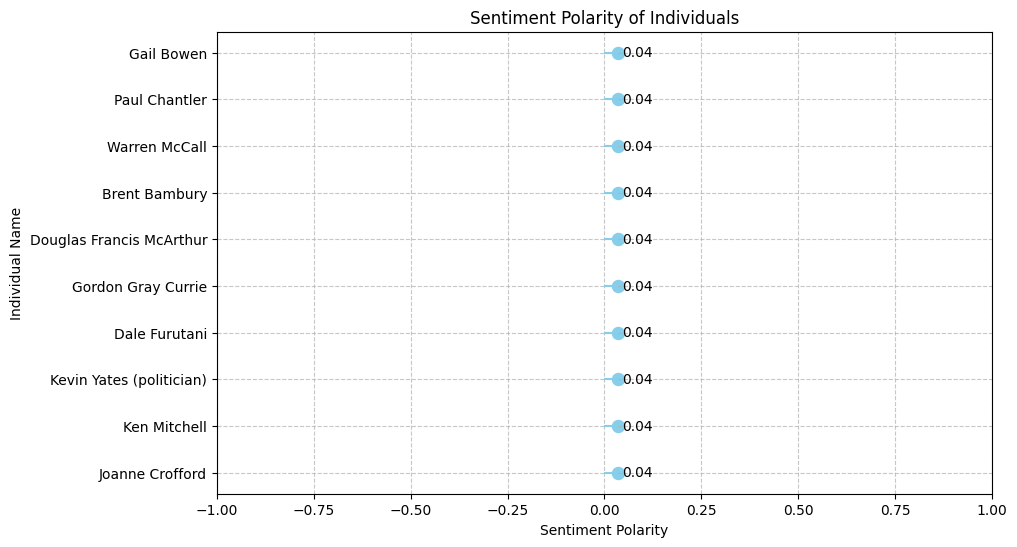

In [ ]:
import matplotlib.pyplot as plt

names = df2['name']
sentiment_polarities = df2['sentiment_polarity']


# Create the horizontal bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.hlines(y=names, xmin=0, xmax=sentiment_polarities, color='skyblue')
plt.scatter(sentiment_polarities, names, color='skyblue', s=75)

# Customize the plot
plt.title('Sentiment Polarity of Individuals')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Individual Name')
plt.grid(True, linestyle='--', alpha=0.7)


# Add sentiment labels to the points
for i, sentiment_polarity in enumerate(sentiment_polarities):
    plt.text(sentiment_polarity + 0.01, names[i], f"{sentiment_polarity:.2f}", va='center')

# Set the x-axis limits to center the plot around zero
plt.xlim(-1, 1)


# Show the plot
plt.show()


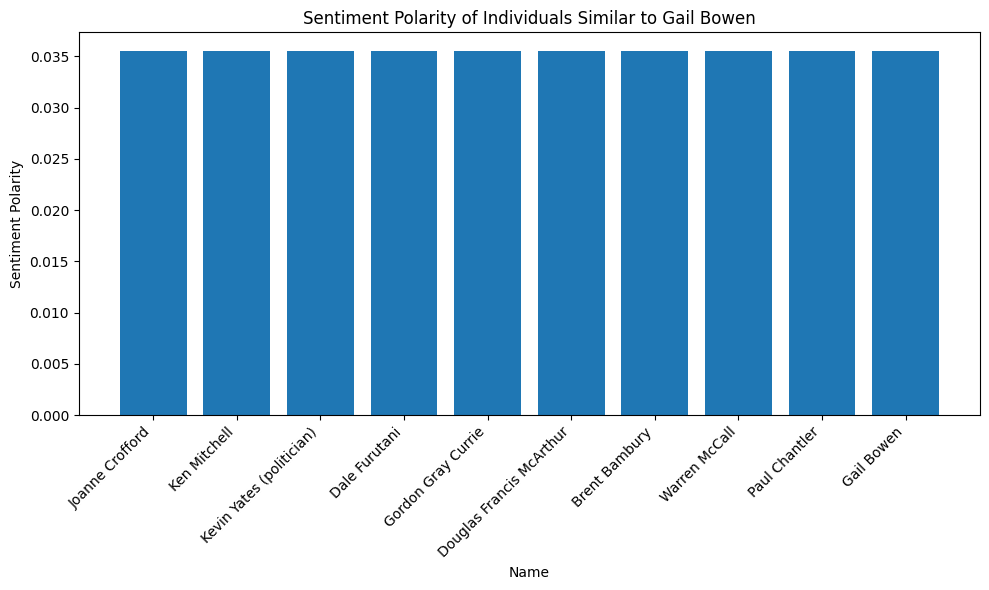

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.bar(df2['name'], df2['sentiment_polarity'])
plt.xlabel('Name')
plt.ylabel('Sentiment Polarity')
plt.title('Sentiment Polarity of Individuals Similar to Gail Bowen')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


### Part 3)


Make an interactive notebook where a user can choose or enter a name and the notebook displays the 10 closest individuals.

In addition to presenting the project slides, at the end of the presentation each student will demonstrate their code using a famous person suggested by the other students that exists in the DBpedia set.


In [ ]:
!curl -s https://ddc-datascience.s3.amazonaws.com/Projects/Project.5-NLP/Data/NLP.csv | wc -l

42786


In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob



name_input = widgets.Text(
    placeholder='Enter a name',
    description='Name:',
    disabled=False
)

# Create an output widget to display the results
output = widgets.Output()

def on_button_clicked(b):
    with output:
        clear_output()  # Clear previous output
        name = name_input.value

        try:
            person_data = df[df['name'] == name]
            if not person_data.empty:
                person_text = person_data['text'].iloc[0]
                analysis = TextBlob(person_text)
                sentiment_polarity = analysis.sentiment.polarity

                if sentiment_polarity > 0.1:
                    sentiment = "positive"
                elif sentiment_polarity < -0.1:
                    sentiment = "negative"
                else:
                    sentiment = "neutral"

                print(f"Sentiment Polarity for {name}: {sentiment}, {sentiment_polarity}")

                # Calculate cosine similarity for content
                vectorizer = TfidfVectorizer()
                tfidf_matrix = vectorizer.fit_transform(df['text'])
                person_index = person_data.index[0]
                cosine_similarities = cosine_similarity(tfidf_matrix[person_index], tfidf_matrix).flatten()
                related_docs_indices = cosine_similarities.argsort()[:-11:-1]
                related_docs_indices = related_docs_indices[related_docs_indices != person_index]

                print(f"\n10 most similar people to {name} (by content):")
                for i in related_docs_indices:
                    print(f"- {df['name'].iloc[i]} (URL: {df['URI'].iloc[i]}), {sentiment}, {sentiment_polarity}")

                # Calculate cosine similarity for sentiment
                sentiment_series = df['text'].apply(lambda text: TextBlob(text).sentiment.polarity)
                sentiment_matrix = sentiment_series.reshape(-1, 1)  # Reshape for cosine similarity
                person_sentiment = sentiment_series[person_index]
                sentiment_similarities = cosine_similarity(
                    [[person_sentiment]], sentiment_matrix
                ).flatten()

                sentiment_indices = sentiment_similarities.argsort()[:-11:-1]
                sentiment_indices = sentiment_indices[sentiment_indices != person_index]  # Exclude self

                print(f"\n10 most similar people to {name} (by sentiment):")
                for i in sentiment_indices:
                    print(f"- {df['name'].iloc[i]} , Sentiment Polarity: {sentiment_series.iloc[i]:.2f}")

            else:
                print(f"{name} not found in the dataset.")
        except Exception as e:
            print(f"An error occurred: {e}")

button = widgets.Button(description="Analyze")
button.on_click(on_button_clicked)

display(name_input, button, output)


# Reset Button - not working
reset_button = widgets.Button(description="Reset")



Sentiment Polarity for Oprah Winfrey: positive, 0.1851827801827802

10 most similar people to Oprah Winfrey (by content):
- Peter B. Collins (URL: <http://dbpedia.org/resource/Peter_B._Collins>), positive, 0.1851827801827802
- Ellen DeGeneres (URL: <http://dbpedia.org/resource/Ellen_DeGeneres>), positive, 0.1851827801827802
- Dave Brindle (URL: <http://dbpedia.org/resource/Dave_Brindle>), positive, 0.1851827801827802
- David Stein (radio host) (URL: <http://dbpedia.org/resource/David_Stein_(radio_host)>), positive, 0.1851827801827802
- Gretchen Massey (URL: <http://dbpedia.org/resource/Gretchen_Massey>), positive, 0.1851827801827802
- Mike Siegel (URL: <http://dbpedia.org/resource/Mike_Siegel>), positive, 0.1851827801827802
- Jon Stewart (URL: <http://dbpedia.org/resource/Jon_Stewart>), positive, 0.1851827801827802
- Tyra Banks (URL: <http://dbpedia.org/resource/Tyra_Banks>), positive, 0.1851827801827802
- Chip Franklin (URL: <http://dbpedia.org/resource/Chip_Franklin>), positive, 0.18

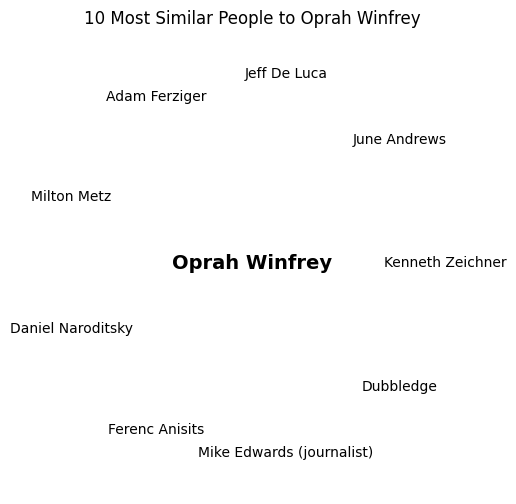

Text(value='', description='Name:', placeholder='Enter a name')

Button(description='Analyze', style=ButtonStyle())

Button(description='Reset', style=ButtonStyle())

Output()

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
import matplotlib.pyplot as plt
import numpy as np



name_input = widgets.Text(
    placeholder='Enter a name',
    description='Name:',
    disabled=False
)

# Create an output widget to display the results
output = widgets.Output()

def on_button_clicked(b):
    with output:
        clear_output()  # Clear previous output
        name = name_input.value

        try:


            # Graph Visualization
            fig, ax = plt.subplots(figsize=(8, 8))
            ax.set_title(f"Similar Individuals to {name}")

            # Calculate distances for graph
            distances = 1 - cosine_similarities[related_docs_indices]

            # Create a circular layout
            angles = np.linspace(0, 2 * np.pi, len(related_docs_indices), endpoint=False)
            x = distances * np.cos(angles)
            y = distances * np.sin(angles)

            # Plot entered name in the center
            ax.scatter(0, 0, s=100, color="red", label=name)
            ax.text(0, 0, name, color="black", horizontalalignment="center", verticalalignment="center")

            # Plot related individuals with clickable names
            for i, (dist, angle, index) in enumerate(zip(distances, angles, related_docs_indices)):
                related_name = df['name'].iloc[index]
                ax.scatter(dist * np.cos(angle), dist * np.sin(angle), s=50, color="blue")
                text = ax.text(dist * np.cos(angle), dist * np.sin(angle), related_name, color="black",
                            horizontalalignment="center", verticalalignment="center")

                # Make names clickable
                text.set_picker(True)
                text.set_cursor("pointer")

                def onclick(event, related_name=related_name):
                    name_input.value = related_name
                    on_button_clicked(None)  # Trigger analysis again

                text.on_pick(onclick)

            ax.legend()
            plt.show()

        except Exception as e:
            print(f"An error occurred: {e}")

# ... (previous code) ...

# Reset Button
reset_button = widgets.Button(description="Reset")

def on_reset_clicked(b):
    name_input.value = ""  # Clear the input field
    with output:
        clear_output()  # Clear the output area

reset_button.on_click(on_reset_clicked)

display(name_input, button, reset_button, output)